# Wisconsin Breast Cancer Variational Quantum Classifier

<hr>

## Prepared by Ikram El-hajri <br>

##### 16/05/2024
![img](img.jpg)

<a id='toc'></a>
# Table of Content

* [Introduction](#intro)
* [Importing packages and loading data](#pac)
* [Data cleaning and data wrangling](#clean)
* [Exploratory Data Analysis (EDA)](#eda)
    * [Basic Statistical Details](#bsd)
    * [Violin plot of features by diagnosis](#vpf)
    * [Kde Plot For Each Mean Feature](#kde)
    * [Relationship Between Features](#rbf)
        * [Correlation Heatmap](#chm)
        * [Feature Pair](#fp)
        * [Positively Correlated Features](#pcf)
        * [Un-Correlated Features](#ucf)
        * [Negatively Correlated Features](#ncf)
* [Statistical Analysis(Outliers)](#sa)
    * [Box Plot](#bp)
    * [Remove Outliers Using IQR](#iqr)
* [Principal Component Analysis(PCA)](#pca)
* [t-SNE (t-distributed Stochastic Neighbor Embedding)](#tsne)
* [Machine Learning Classification](#ml)
    * [Building Feature Set](#sp)
    * [Support Vector Machine (SVM)](#svm)
        * [Kernel Selection Using Learning Curve ](#ks)
        * [Selection of Regularization parameter(C)](#srp)
        * [Confusion Metrix and ROC Curve](#cmrc)
* [Summary of models performance](#sum)

<a id='pac'></a>
## Importing Packages and Loading Data

In [3]:
!pip uninstall -y qiskit==0.42

Found existing installation: qiskit 1.0.2
Uninstalling qiskit-1.0.2:
  Successfully uninstalled qiskit-1.0.2


In [5]:
!pip install qiskit==0.19.6 qiskit-aer qiskit-algorithms qiskit-ibmq-provider qiskit-ignis qiskit-terra

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
     ---------------------------------------- 

ERROR: Cannot install qiskit, qiskit-aer==0.5.2, qiskit-algorithms==0.1.0, qiskit-algorithms==0.2.0, qiskit-algorithms==0.2.1, qiskit-algorithms==0.2.2, qiskit-algorithms==0.3.0, qiskit-ibmq-provider==0.7.2, qiskit-ignis==0.3.3, qiskit-terra and qiskit==0.19.6 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [1]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.4.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.12
anaconda-anon-usage           0.4.4
anaconda-client               1.12.3
anaconda-navigator            2.3.1
annotated-types               0.6.0
ansi2html                     1.8.0
anyio                         3.5.0
appdirs                       1.4.4
arabert                       1.0.1
arabic-reshaper               3.0.0
arabicstemmer                 0.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.4.1
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.3.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         23.1.0
autogr

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Ignore warnings

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from qiskit.circuit.library import ZZFeatureMap, EfficientSU2, PauliFeatureMap

from qiskit_machine_learning.algorithms import VQC

from qiskit_algorithms.optimizers import COBYLA

from qiskit import transpile
from qiskit.utils import QuantumInstance
import time

ImportError: cannot import name 'QuantumInstance' from 'qiskit.utils' (C:\Users\HP\.platformio\penv\Lib\site-packages\qiskit\utils\__init__.py)

In [3]:
!pip install qiskit-aer qiskit-terra qiskit-aqua

<a id='data'></a>
### Load the Data

In [7]:
# Set your Kaggle API credentials (API key)
os.environ['KAGGLE_USERNAME'] = 'ikramelhajri'
os.environ['KAGGLE_KEY'] = '414da186fbf2686d7e14360783904118'

In [8]:
# Specify the dataset details
dataset_slug = "uciml/breast-cancer-wisconsin-data"
dataset_path = "/data/breast_cancer_data"

In [9]:
# Download the dataset using Kaggle API
!kaggle datasets download -d {dataset_slug} -p {dataset_path} --unzip

print("Dataset downloaded at:", dataset_path)

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0

Dataset downloaded at: /data/breast_cancer_data



  0%|          | 0.00/48.6k [00:00<?, ?B/s]
100%|##########| 48.6k/48.6k [00:00<00:00, 503kB/s]


In [10]:
csv_file_path = "/data/wisc_bc_data/wisc_bc_data.csv"
df = pd.read_csv(csv_file_path)

In [11]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
id,87139402,8910251,905520,868871,9012568,906539,925291,87880,862989,89827,...,9110944,854268,89511501,9113156,894855,911320502,898677,873885,911201,9012795
diagnosis,B,B,B,B,B,B,B,M,B,B,...,B,M,B,B,B,B,B,M,B,M
radius_mean,12.32,10.6,11.04,11.28,15.19,11.57,11.51,13.81,10.49,11.06,...,14.8,14.25,12.2,14.4,12.86,13.17,10.26,15.28,14.53,21.37
texture_mean,12.39,18.95,16.83,13.39,13.21,19.04,23.93,23.75,19.29,14.96,...,17.66,21.72,15.21,26.99,13.32,18.22,14.71,22.41,13.98,15.1
perimeter_mean,78.85,69.28,70.92,73.0,97.65,74.2,74.52,91.56,67.41,71.49,...,95.88,93.63,78.01,92.25,82.82,84.28,66.2,98.92,93.86,141.3


In [12]:
X = df.drop(columns=['id', 'diagnosis'])  
y = df['diagnosis'] 

In [34]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=109)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [25]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=109)
# X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [35]:
X_train

array([[1.422e+01, 2.312e+01, 9.437e+01, ..., 1.772e-01, 5.166e-01,
        1.446e-01],
       [1.120e+01, 2.937e+01, 7.067e+01, ..., 0.000e+00, 1.566e-01,
        5.905e-02],
       [1.650e+01, 1.829e+01, 1.066e+02, ..., 9.123e-02, 2.394e-01,
        6.469e-02],
       ...,
       [1.611e+01, 1.805e+01, 1.051e+02, ..., 1.216e-01, 2.792e-01,
        8.158e-02],
       [1.048e+01, 1.986e+01, 6.672e+01, ..., 6.736e-02, 2.883e-01,
        7.748e-02],
       [1.729e+01, 2.213e+01, 1.144e+02, ..., 1.528e-01, 3.067e-01,
        7.484e-02]])

### Standardization of Features

In this portion of the code, the `StandardScaler` from the `sklearn.preprocessing` module is used to standardize the features of the dataset. Standardization is a common preprocessing technique used in machine learning to transform the features so that they have a mean of 0 and a standard deviation of 1. This process ensures that all features are on the same scale, which can be beneficial for certain machine learning algorithms, especially those that are sensitive to the scale of the input data.

#### Steps:

1. **Fit Scaler to Training Data:**
   - The `StandardScaler` object is instantiated and then fitted to the training data (`X_train`) using the `fit()` method. This step calculates the mean and standard deviation of each feature in the training data.

2. **Transform Training and Testing Data:**
   - The fitted scaler is then used to transform both the training data (`X_train`) and the testing data (`X_test`) using the `transform()` method. This step applies the standardization transformation to both datasets based on the mean and standard deviation calculated from the training data.

#### Result:
After this process, both the training and testing datasets will have their features standardized, with a mean of 0 and a standard deviation of 1. Standardizing the features helps ensure that the model is not influenced by the scale of the input features, which can lead to more stable and reliable predictions.


In [36]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Dimensionality Reduction with Principal Component Analysis (PCA)

In this part of the code, Principal Component Analysis (PCA) is employed for dimensionality reduction. PCA is a technique used to reduce the number of features in a dataset while preserving most of its variance. It achieves this by transforming the original features into a new set of linearly uncorrelated features called principal components.

#### Steps:

1. **Define the Number of Components:**
   - A variable `n` is defined, representing the desired number of principal components to retain after dimensionality reduction. In this case, `n = 2` suggests that the dataset will be transformed into a two-dimensional space.

2. **Fit PCA to Training Data:**
   - An instance of the `PCA` class from the `sklearn.decomposition` module is created and fitted to the training data (`X_train`) using the `fit()` method. During this process, PCA calculates the principal components based on the training data.

3. **Transform Training and Testing Data:**
   - The fitted PCA model is used to transform both the training data (`X_train`) and the testing data (`X_test`) into a reduced-dimensional space using the `transform()` method. This step projects the original data onto the principal components, resulting in new feature representations with reduced dimensionality.

#### Result:
After applying PCA, both the training and testing datasets will have their features transformed into a lower-dimensional space while retaining most of the variance in the original data. Reducing the dimensionality of the dataset can help improve computational efficiency and mitigate the curse of dimensionality, especially in cases where there are many features relative to the number of samples.


In [37]:
n = 2
pca = PCA(n_components=n).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

### Min-Max Scaling

This section of the code utilizes Min-Max Scaling to normalize the features of the dataset. Min-Max Scaling is a technique used to scale numerical features to a specific range, typically between 0 and 1 or -1 and 1. It works by subtracting the minimum value and then dividing by the difference between the maximum and minimum values of each feature.

#### Steps:

1. **Combine Training and Testing Data:**
   - The training data (`X_train`) and testing data (`X_test`) are combined into a single array `samples` using `np.append()` function along the 0-axis (rows). This step is necessary to ensure consistent scaling across both datasets.

2. **Fit Min-Max Scaler to Combined Data:**
   - An instance of the `MinMaxScaler` class from the `sklearn.preprocessing` module is created and fitted to the combined data (`samples`) using the `fit()` method. During this process, the minimum and maximum values of each feature are computed from the combined data.

3. **Transform Training and Testing Data:**
   - The fitted Min-Max scaler is then used to transform both the training data (`X_train`) and the testing data (`X_test`) using the `transform()` method. This step scales each feature to the specified range (-1 to 1 in this case) based on the minimum and maximum values computed from the combined data.

#### Result:
After applying Min-Max Scaling, both the training and testing datasets will have their features normalized to the specified range (-1 to 1). Normalizing the features helps in bringing all features to a similar scale, which can improve the performance of certain machine learning algorithms, particularly those sensitive to feature scales.


In [38]:
samples = np.append(X_train, X_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
X_train = minmax_scale.transform(X_train)
X_test = minmax_scale.transform(X_test)

### Data Splitting for Training and Testing

This section of the code divides the dataset into training and testing subsets for each class label. It ensures that both classes (Benign and Malignant) have a specified number of samples for training and testing.

#### Steps:

1. **Define Training and Testing Sizes:**
   - Two variables, `training_size` and `test_size`, are set to specify the number of samples to be included in the training and testing subsets, respectively.

2. **Class Labels Definition:**
   - The class labels are defined as `Benign` and `Malignant`, represented by strings. These labels will be used to organize the data for each class.

3. **Data Organization for Training and Testing:**
   - For each class label, the training and testing data are organized into dictionaries (`training_input` and `test_input`, respectively).
   - Using a dictionary comprehension, the data is filtered based on the class label (`Y_train == k`) and indexed to select the desired number of samples for training and testing.
   - For each class label, the training data is sliced from the beginning up to `training_size` samples, and the testing data is sliced from `training_size` to `(training_size + test_size)` samples.

#### Result:
After executing this code, the training and testing data for each class label (`Benign` and `Malignant`) will be organized into separate dictionaries (`training_input` and `test_input`). These dictionaries will contain subsets of data specified by the `training_size` and `test_size` variables, ensuring a balanced representation of samples from each class in both the training and testing datasets.


In [39]:
training_size = 20
test_size = 10
class_labels = [r'Benign', r'Malignant']

In [40]:
training_input = {key: (X_train[Y_train == k, :])[:training_size] for k, key in enumerate(class_labels)}
test_input = {key: (X_train[Y_train == k, :])[training_size:(
    training_size+test_size)] for k, key in enumerate(class_labels)}

### Data Organization for Training and Testing

In this part of the code, the training and testing data for each class label (`Benign` and `Malignant`) are organized into separate dictionaries (`training_input` and `test_input`). These dictionaries contain subsets of data specified by the `training_size` and `test_size` variables.

#### Training Data:

- **Benign Class:**
  - The training data for the `Benign` class consists of 20 samples, represented as an array with shape `(20, 2)`. Each row corresponds to a sample, and each column represents a feature.

- **Malignant Class:**
  - Similarly, the training data for the `Malignant` class also contains 20 samples, represented as an array with shape `(20, 2)`.

#### Testing Data:

- **Benign Class:**
  - The testing data for the `Benign` class consists of 10 samples, represented as an array with shape `(10, 2)`.

- **Malignant Class:**
  - Similarly, the testing data for the `Malignant` class also contains 10 samples, represented as an array with shape `(10, 2)`.

#### Interpretation:
The data organization ensures that both classes have a balanced representation in both the training and testing datasets. Each class label has a specified number of samples for training (`20`) and testing (`10`). This organization is essential for training and evaluating machine learning models effectively, as it provides a fair representation of both classes in the datasets.


In [41]:
training_input

{'Benign': array([[ 1.54666343e-01,  5.55981513e-01],
        [-1.59901700e-01, -4.29529264e-01],
        [-3.10571729e-01, -1.90198686e-01],
        [-1.31476605e-01, -3.94517553e-01],
        [-3.09442720e-01, -4.37714804e-01],
        [-5.74283098e-01, -3.68272133e-01],
        [-9.08218284e-02,  8.06158477e-02],
        [-8.34836357e-02, -9.56553242e-02],
        [-7.08568012e-01, -2.86698683e-01],
        [-4.00284551e-02, -3.57512836e-01],
        [-2.42542319e-01, -1.96261431e-05],
        [-2.01462863e-01, -4.01415734e-01],
        [-3.51150516e-01,  3.01688531e-03],
        [ 3.94339422e-01, -7.65699924e-01],
        [-3.05573782e-02,  7.53985894e-02],
        [ 3.63807376e-01, -1.58992983e-01],
        [ 2.88870769e-01,  3.71318425e-02],
        [-2.36300673e-01,  3.59046833e-02],
        [-4.16060955e-01, -1.60567397e-01],
        [ 8.17221789e-02, -2.91444377e-01]]),
 'Malignant': array([[-0.93682724, -0.41390706],
        [-0.55804035, -0.41478057],
        [-0.85962014, -

In [42]:
test_input

{'Benign': array([[-0.18701881, -0.05887415],
        [-0.41969524, -0.14556651],
        [-0.17530215,  0.11928263],
        [-0.11330792, -0.50174817],
        [-0.00978474, -0.40939672],
        [-0.24896605,  0.17169182],
        [-0.3616769 , -0.37676914],
        [-0.3669769 , -0.38935638],
        [-0.00982132, -0.87140379],
        [-0.16271896, -0.37946278]]),
 'Malignant': array([[-0.76691978, -0.26788732],
        [-0.83274125, -0.34036737],
        [-0.06285921,  0.6778442 ],
        [-0.70374229, -0.364161  ],
        [-0.90750905, -0.50363411],
        [-0.37930336,  0.02840254],
        [-0.73366262,  0.01485531],
        [-0.65205472, -0.06960286],
        [-0.78968096, -0.15883419],
        [-0.69868338, -0.14360801]])}

### Visualization of Training Data Distribution

This part of the code visualizes the distribution of the training data points for both the `Benign` and `Malignant` classes in a scatter plot.

#### Scatter Plot:

- **Benign Class:**
  - The training data points for the `Benign` class are plotted as blue dots. The x-axis represents the first principal component, and the y-axis represents the second principal component.

- **Malignant Class:**
  - Similarly, the training data points for the `Malignant` class are plotted as orange dots.

#### Interpretation:
The scatter plot provides a visual representation of how the training data points are distributed in the reduced-dimensional space after dimensionality reduction (e.g., PCA). It allows for an intuitive understanding of the separation between the two classes based on their feature representations.

### Size of Training Set

After visualizing the training data distribution, the code calculates and prints the total size of the training set, which is the sum of the number of samples in the `Benign` and `Malignant` classes.

#### Output:
The output displays the size of the training set, which is `40` in this case.

#### Conclusion:
The visualization and size calculation provide insights into the composition of the training data set, which is crucial for understanding the dataset's characteristics and preparing it for training machine learning models.

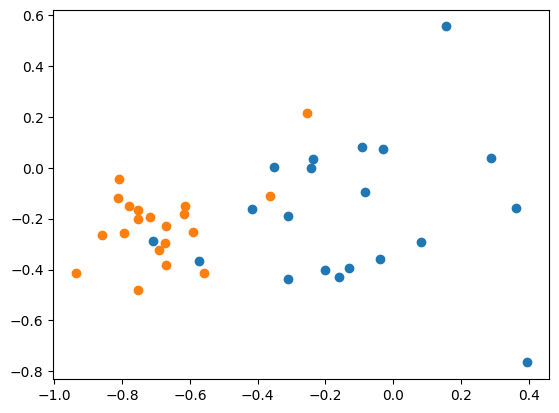

size training set: 40


In [43]:
plt.scatter(training_input['Benign'][:,0], training_input['Benign'][:,1])
plt.scatter(training_input['Malignant'][:,0], training_input['Malignant'][:,1])
plt.show()
length_data = len(training_input['Benign']) + len(training_input['Malignant'])
print("size training set: {}".format(length_data))

### Feature Map Visualization

In this part of the code, a feature map is constructed using the PauliFeatureMap from the Qiskit Aqua library. Feature maps are quantum circuits designed to encode classical data into quantum states, enabling quantum algorithms to process classical data. The PauliFeatureMap specifically uses Pauli gates to map classical features into quantum states.

#### Parameters:
- **Feature Dimension (`feature_dimension`):**
  - The `feature_dimension` parameter specifies the number of input features. In this case, it is set to `n`, indicating the dimensionality of the feature space.

- **Repetitions (`reps`):**
  - The `reps` parameter specifies the number of repetitions of the feature map circuit. It determines the depth of the quantum circuit. Here, it is set to `n`, indicating that the circuit will be repeated `n` times.

- **Entanglement Type (`entanglement`):**
  - The `entanglement` parameter determines how qubits are entangled within the circuit. In this code, `'full'` entanglement is used, which means that every qubit is entangled with every other qubit in the circuit.

#### Visualization:
The `draw()` method is called on the `feature_map` object to generate a visualization of the feature map circuit. The output format is specified as `'mpl'`, indicating that the visualization will be rendered using Matplotlib.


#### Conclusion:
Feature maps play a crucial role in quantum machine learning algorithms, as they bridge the gap between classical data and quantum states. Visualizing the feature map helps in understanding its structure and optimizing it for better performance in quantum algorithms.


In [46]:
# Feature map
# !pip install pylatexenc

feature_map = PauliFeatureMap(feature_dimension=n,reps=n,  entanglement='full')
feature_map.decompose().draw()

┌───┐┌─────────────┐                                          ┌───┐»
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■──┤ H ├»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└─────────────┘└───┘└──────────────────────────────┘└───┘└───┘»
«     ┌─────────────┐                                          
«q_0: ┤ P(2.0*x[0]) ├──■────────────────────────────────────■──
«     ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐
«q_1: ┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └─────────────┘└───┘└──────────────────────────────┘└───┘

### Variational Circuit Visualization

In this section, a variational circuit is constructed using the EfficientSU2 class from the Qiskit Aqua library. Variational circuits are an essential component of variational quantum algorithms, including Variational Quantum Classifiers (VQC). These circuits are designed to implement parameterized quantum operations that can be optimized to minimize a cost function during the training process.

#### Parameters:
- **Number of Qubits (`n`):**
  - The `n` parameter specifies the number of qubits in the variational circuit. This parameter is typically determined by the dimensionality of the feature space or the complexity of the quantum classification task.

- **Entanglement Type (`entanglement`):**
  - The `entanglement` parameter determines how qubits are entangled within the circuit. In this code, `'full'` entanglement is used, indicating that every qubit is entangled with every other qubit in the circuit.

- **Repetitions (`reps`):**
  - The `reps` parameter specifies the number of repetitions of parameterized quantum gates in the circuit. It determines the depth of the variational circuit and affects its expressiveness and optimization capabilities.

#### Visualization:
The `draw()` method is called on the `var_circuit` object to generate a visual representation of the variational circuit. The output format is specified as `'mpl'`, indicating that the visualization will be rendered using Matplotlib.

#### Interpretation:
The visualization provides a graphical representation of the variational circuit, showing the arrangement of quantum gates and qubits. Variational circuits are characterized by their parameterized structure, where certain aspects of the circuit, such as gate angles or gate placements, can be adjusted during the optimization process to minimize the cost function.

#### Conclusion:
Variational circuits are fundamental components of variational quantum algorithms, such as VQC, as they enable the representation and optimization of quantum models for machine learning tasks. Visualizing the variational circuit helps in understanding its structure and parameterization, which are crucial for training and optimizing quantum machine learning models.


In [47]:
var_circuit = EfficientSU2(n, entanglement='full', reps=n)  #Variational circuit
var_circuit.decompose().draw()

┌──────────┐┌──────────┐     ┌──────────┐┌──────────┐     ┌──────────┐»
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[2]) ├──■──┤ Ry(θ[4]) ├┤ Rz(θ[6]) ├──■──┤ Ry(θ[8]) ├»
     ├──────────┤├──────────┤┌─┴─┐├──────────┤├──────────┤┌─┴─┐├──────────┤»
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[3]) ├┤ X ├┤ Ry(θ[5]) ├┤ Rz(θ[7]) ├┤ X ├┤ Ry(θ[9]) ├»
     └──────────┘└──────────┘└───┘└──────────┘└──────────┘└───┘└──────────┘»
«     ┌───────────┐
«q_0: ┤ Rz(θ[10]) ├
«     ├───────────┤
«q_1: ┤ Rz(θ[11]) ├
«     └───────────┘

### Classical Optimizer Definition

In this part of the code, a classical optimizer is defined using the COBYLA algorithm from the `scipy.optimize` module. Classical optimizers play a crucial role in variational quantum algorithms, such as Variational Quantum Classifiers (VQC), by optimizing the parameters of the variational circuit to minimize a cost function.

#### Parameters:
- **Maximum Iterations (`maxiter`):**
  - The `maxiter` parameter specifies the maximum number of iterations that the classical optimizer will perform during the optimization process. It determines the maximum number of times the cost function will be evaluated before the optimization terminates.

- **Tolerance (`tol`):**
  - The `tol` parameter sets the tolerance level for convergence of the optimization algorithm. It determines the threshold for the change in the objective function that indicates convergence. Once the change falls below this threshold, the optimization process terminates.

#### COBYLA Algorithm:
COBYLA (Constrained Optimization BY Linear Approximations) is an optimization algorithm for constrained optimization problems. It belongs to the class of derivative-free optimization algorithms, meaning it does not require gradient information of the objective function. COBYLA iteratively updates the parameter values based on linear approximations of the objective function and constraints.

#### Usage in VQC:
In VQC, classical optimizers like COBYLA are used to find the optimal parameters of the variational circuit that minimize a cost function, typically associated with the difference between the predicted and actual labels of the training data. The optimized parameters determine the quantum model's ability to classify unseen data accurately.

#### Conclusion:
The definition of the classical optimizer using the COBYLA algorithm is a critical step in training VQC models. It enables the optimization of the variational circuit's parameters, ultimately improving the model's performance in classifying quantum states.


In [48]:
cls_opt = COBYLA(maxiter=500, tol=0.001)   #classical optimizer

### Backend Configuration for Quantum Simulation

In this section of the code, the backend configuration for simulating quantum circuits is defined.<br>
The `backend` refers to the target platform or environment where the quantum computation is executed. It could be a real quantum device or a simulator that emulates quantum behavior on a classical computer.<br>
The chosen backend is the `qasm_simulator` provided by the Qiskit Aer module, which is used for simulating quantum circuits on classical computers.

#### Parameters:
- **Seed for Random Number Generation (`seed`):**
  - The `seed` parameter is used to initialize the random number generator, ensuring reproducibility of results across different runs of the simulation. By setting a specific seed value, the same random numbers will be generated each time the simulation is executed, allowing for consistent outcomes.

- **Backend (`backend`):**
  - The `backend` parameter specifies the target backend for the simulation. In this case, the `qasm_simulator` backend is chosen, which simulates the execution of quantum circuits using the quantum assembly (qasm) language.

- **Backend Options (`backend_options`):**
  - The `backend_options` parameter provides additional configuration options for the chosen backend. Here, the `"method"` option is set to `"statevector"`, indicating that the simulation will use the statevector method for calculating the quantum states of the circuit. This method is known for providing accurate results, especially for small to moderate-sized circuits.

#### Interpretation:
The configuration ensures that the quantum circuits will be simulated using the qasm_simulator backend with the statevector method enabled. This setup is chosen for its reliability and accuracy in simulating quantum circuits, making it suitable for training and testing variational quantum algorithms like VQC.

#### Conclusion:
Configuring the backend for quantum simulation is a crucial step in preparing for the execution of quantum circuits. By selecting appropriate backend options and setting the random seed, researchers can ensure reproducibility and reliability in their quantum simulations, facilitating the development and testing of quantum machine learning models.


In [52]:
!pip uninstall -y qiskit
!pip install qiskit==0.33.1

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/237.9 kB ? eta -:--:--
   ----- --------------------------------- 30.7/237.9 kB 660.6 kB/s eta 0:00:01
   ---------------------------------- ----- 204.8/237.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 237.9/237.9 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/200.9 kB ? eta -:--:--
   --------------------------------------- 200.9/200.9 kB 12.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   - -------------------------------------- 0.2/5.6 MB ? eta -:--:--
   ----- ---------------------------------- 0.8/5.6 MB 10.0 MB/s eta 0:00:01
   ------- -------------------------------- 1.0/5.6 MB 8.3 MB/s eta 0:00:01
   ------- -------------------------------- 1.0/5.6 MB 8.3 MB/s eta 0:00:01
   ------- -------------------------------- 1.1/5.6 MB 4.9 MB/s eta 0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-algorithms 0.3.0 requires qiskit>=0.44, but you have qiskit 0.33.1 which is incompatible.


In [2]:
!pip install qiskit_aer==0.10.3
from qiskit_aer import AerSimulator

seed = 10598

# setting our backend to qasm_simulator with the "statevector" method on. This particular setup is given as it was 
# found to perform better than most. Feel free to play around with different backend options.
backend = Aer.get_backend('qasm_simulator')
backend_options = {"method": "statevector"}

   ---------------------------------------- 0.0/24.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.2 MB 262.6 kB/s eta 0:01:33
   ---------------------------------------- 0.0/24.2 MB 281.8 kB/s eta 0:01:26
   ---------------------------------------- 0.1/24.2 MB 393.8 kB/s eta 0:01:02
   ---------------------------------------- 0.2/24.2 MB 958.4 kB/s eta 0:00:26
    --------------------------------------- 0.6/24.2 MB 2.2 MB/s eta 0:00:11
   - -------------------------------------- 1.0/24.2 MB 3.3 MB/s eta 0:00:07
   - -------------------------------------- 1.0/24.2 MB 3.3 MB/s eta 0:00:07
   -- ------------------------------------- 1.3/24.2 MB 3.2 MB/s eta 0:00:08
   --- ------------------------------------ 1.8/24.2 MB 4.0 MB/s eta 0:00:06
   --- ------------------------------------ 2.1/24.2 MB 4.2 MB/s eta 0:00:06
   --- ------------------------------------ 2.1/24.2 MB 4.2 MB/s eta 0:00:06
   --

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit 0.33.1 requires qiskit-aer==0.9.1, but you have qiskit-aer 0.10.3 which is incompatible.
qiskit-algorithms 0.3.0 requires qiskit>=0.44, but you have qiskit 0.33.1 which is incompatible.


ModuleNotFoundError: No module named 'qiskit_aer'

In [ ]:
!pip list | grep qiskit

### Quantum Instance Configuration

In this part of the code, a quantum instance is created using the backend and backend options defined earlier. The quantum instance serves as a configuration object that specifies various parameters for running quantum algorithms, including the backend, shots, and seed values for reproducibility.

#### Parameters:
- **Backend (`backend`):**
  - The `backend` parameter specifies the target backend for executing quantum circuits. It determines where the quantum computations will be performed, such as on a local simulator or a real quantum device.

- **Shots (`shots`):**
  - The `shots` parameter sets the number of times the quantum circuit will be executed (or "shot") on the chosen backend. Each shot produces a measurement outcome, allowing for statistical analysis of the quantum states.

- **Seed for Simulator (`seed_simulator`):**
  - The `seed_simulator` parameter sets the seed value for the random number generator used in the simulator backend. It ensures reproducibility of simulation results by initializing the random number generator with the same seed value for each simulation run.

- **Seed for Transpiler (`seed_transpiler`):**
  - The `seed_transpiler` parameter sets the seed value for the transpiler, which is responsible for optimizing and mapping quantum circuits to the target backend. Setting the seed ensures that the transpiler produces consistent circuit optimizations across different runs.

- **Backend Options (`backend_options`):**
  - The `backend_options` parameter provides additional configuration options for the chosen backend, such as the method used for simulation (e.g., statevector method).

#### Interpretation:
The quantum instance is configured to use the specified backend (`qasm_simulator`) with the given backend options and seed values for reproducibility. By setting the shots parameter, the instance will execute the quantum circuit multiple times to collect measurement statistics, allowing for probabilistic analysis of the quantum states.

#### Conclusion:
Creating a quantum instance with the appropriate configuration parameters is essential for running quantum algorithms reliably and reproducibly. The configured instance can be used to execute variational quantum algorithms like VQC and analyze their performance on different datasets.


In [ ]:
# creating a quantum instance using the backend and backend options taken before
quantum_instance = QuantumInstance(backend, shots=1050, seed_simulator=seed, seed_transpiler=seed, 
                                   backend_options=backend_options)

In [ ]:
?VQC

### Variational Quantum Classifier (VQC) Instance Creation

In this section of the code, a VQC instance is created for training. VQC is a quantum machine learning algorithm that combines classical and quantum components to perform classification tasks. The VQC instance is configured with various components, including the feature map, variational ansatz, and classical optimizer.

#### Components:
- **Feature Map (`feature_map`):**
  - The `feature_map` parameter specifies the feature map used to encode classical data into quantum states. It defines the mapping between classical feature vectors and quantum states, facilitating the quantum processing of classical data.

- **Variational Ansatz (`ansatz`):**
  - The `ansatz` parameter specifies the variational ansatz, which is a parameterized quantum circuit that represents the hypothesis space of the VQC model. It contains trainable parameters that are optimized during the training process to minimize the classification error.

- **Optimizer (`optimizer`):**
  - The `optimizer` parameter specifies the classical optimizer used to optimize the parameters of the variational ansatz. It adjusts the parameters iteratively to minimize a cost function, typically associated with the difference between predicted and actual labels of the training data.

#### Usage:
- The VQC instance is configured with the provided feature map, variational ansatz, and classical optimizer.
- Once created, the VQC instance can be trained using labeled training data and evaluated using labeled testing data.

#### Note:
- Ensure that the training_dataset and testing_dataset variables are correctly defined in your program and passed to the VQC instance for training and evaluation.

#### Conclusion:
Creating a VQC instance is a crucial step in training quantum machine learning models. By configuring the feature map, variational ansatz, and optimizer, researchers can define the model architecture and optimization strategy for performing classification tasks on quantum computers.


In [ ]:
# creating a VQC instance which you will be used for training. Make sure you input the correct training_dataset and 
# testing_dataset as defined in your program.
vqc = VQC(feature_map=feature_map, 
          ansatz=var_circuit, 
          optimizer=cls_opt)

### Concatenation of Features and Labels for Training

In this section of the code, the features and corresponding labels for training the Variational Quantum Classifier (VQC) are concatenated into arrays suitable for input to the classifier's `fit` method.

#### Concatenation:
- **Features (`X_train`):**
  - The features for training are concatenated by combining the data from the `'Benign'` and `'Malignant'` classes. The `np.concatenate()` function is used to concatenate the feature arrays along the 0-axis, resulting in a single array containing all training features.

- **Labels (`y_train`):**
  - Similarly, the labels for training are concatenated by combining the labels for the `'Benign'` and `'Malignant'` classes. Since the labels are binary (0 for benign, 1 for malignant), the labels are created by concatenating arrays of zeros and ones corresponding to the respective classes.

#### Interpretation:
- The concatenation of features and labels prepares the training data in a format suitable for training the VQC classifier. Each row of the `X_train` array represents a sample, while the corresponding entry in the `y_train` array represents its label.

### Fitting the VQC Classifier

In this part of the code, the VQC classifier is trained with the concatenated training data.

#### Usage:
- The `fit()` method of the VQC instance (`vqc`) is called with the concatenated features (`X_train`) and labels (`y_train`) as input.
- During the training process, the VQC classifier optimizes the parameters of its variational ansatz using the provided training data to minimize the classification error.

#### Conclusion:
Concatenating the features and labels and training the VQC classifier is a crucial step in the machine learning pipeline. It enables the VQC model to learn from the training data and make predictions on unseen data, facilitating the classification of samples into benign and malignant classes in this context.


In [ ]:
# Concatenate features and labels for training
X_train = np.concatenate([training_input['Benign'], training_input['Malignant']])
y_train = np.concatenate([np.zeros(training_input['Benign'].shape[0]), np.ones(training_input['Malignant'].shape[0])])

# Fit the VQC classifier with your training data
vqc.fit(X_train, y_train)

### Concatenation of Features and Labels for Testing

In this section of the code, the features and corresponding labels for testing the trained Variational Quantum Classifier (VQC) are concatenated into arrays suitable for evaluation.

#### Concatenation:
- **Features (`X_test`):**
  - The features for testing are concatenated by combining the data from the `'Benign'` and `'Malignant'` classes, similar to the training data concatenation. The `np.concatenate()` function is used to concatenate the feature arrays along the 0-axis, resulting in a single array containing all testing features.

- **Labels (`y_test`):**
  - Similarly, the labels for testing are concatenated by combining the labels for the `'Benign'` and `'Malignant'` classes. The labels are binary (0 for benign, 1 for malignant), and the concatenation is done accordingly.

#### Interpretation:
- Concatenating the features and labels prepares the testing data in a format suitable for evaluating the trained VQC classifier. Each row of the `X_test` array represents a sample, while the corresponding entry in the `y_test` array represents its label.

In [ ]:
# Concatenate features and labels for testing
X_test = np.concatenate([test_input['Benign'], test_input['Malignant']])
y_test = np.concatenate([np.zeros(test_input['Benign'].shape[0]), np.ones(test_input['Malignant'].shape[0])])


### Evaluation of the Trained Model

In this part of the code, the trained VQC model is evaluated on the testing data to measure its performance.

#### Usage:
- The `score()` method of the VQC instance (`vqc`) is called with the concatenated testing features (`X_test`) and labels (`y_test`) as input.
- The `score()` method computes the accuracy of the trained model on the testing data, which is the fraction of correctly classified samples.

#### Result:
- The computed accuracy is printed to the console, indicating the performance of the trained VQC classifier on the testing data.

#### Conclusion:
Evaluating the trained VQC model on the testing data provides insights into its generalization performance. The reported accuracy helps assess how well the model can classify unseen samples, indicating its effectiveness in distinguishing between benign and malignant classes.


In [ ]:
# Evaluate the trained model on the test data
accuracy = vqc.score(X_test, y_test)
print("Test set accuracy:", accuracy)